In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import *
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/tutorials


In [2]:
delta = 1
t0 = 0.1
tprime = 0.5

n_super_cell = 2
model = models.chessboard(t0, tprime, delta).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()

n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern_occ = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)
chern_cond = u_wfs_full.berry_flux([i for i in range(n_occ, n_orb)])/(2*np.pi)

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern # occupied: {chern_occ: .1f}")
print(f"Chern # conduction: {chern_cond: .1f}")

Low energy sites: [0 2 4 6]
High energy sites: [1 3 5 7]
Chern # occupied: -0.0
Chern # conduction:  0.0


In [3]:
random = True
low_E = False

if random:
    omit_num = 1
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
else:
    omit_sites = 6
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
if low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")

# of Wannier functions: 3
# of occupied bands: 4
Wannier fraction: 0.75


Wannier function report
 --------------- 
Quadratic spread = [0.8235525  0.7046654  0.56800271]
Omega_i = 1.2496877854911475
Omega_tilde = 0.8465328196279553
Wannier centers: 
 [[0.64654728 0.49727846]
 [0.33384573 0.42477784]
 [0.80047803 0.73005581]]


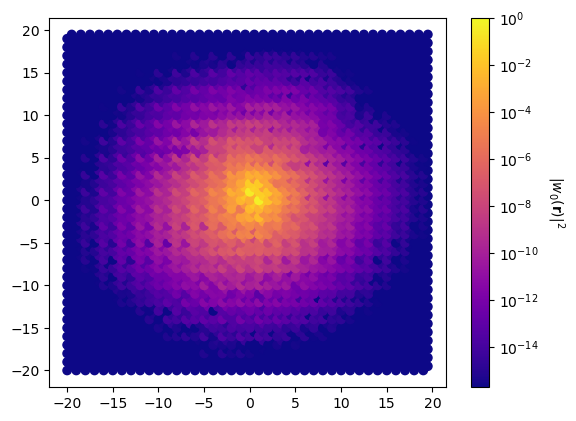

In [4]:
nkx, nky = 20, 20
Nk = nkx * nky
WFs = Wannier(model, [nkx, nky])
WFs.Wannierize(tf_list)
WFs.plot(0)
WFs.report()

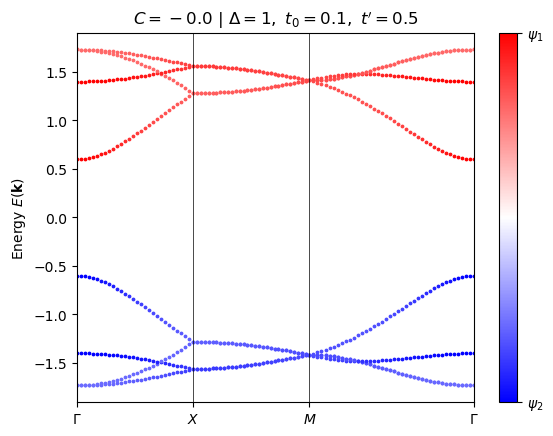

In [5]:
nk = 101
k_path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
k_label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
(k_vec, k_dist, k_node) = model.k_path(k_path, nk, report=False)


title = (rf"$C = {chern_occ: .1f}$ | $\Delta = {delta},\ t_0 = {t0},\ t' = {tprime}$")
fig, ax = WFs.energy_eigstates.plot_bands(
    k_path=k_path, k_label=k_label, sub_lat=True, red_lat_idx=high_E_sites, title=title)

0
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 

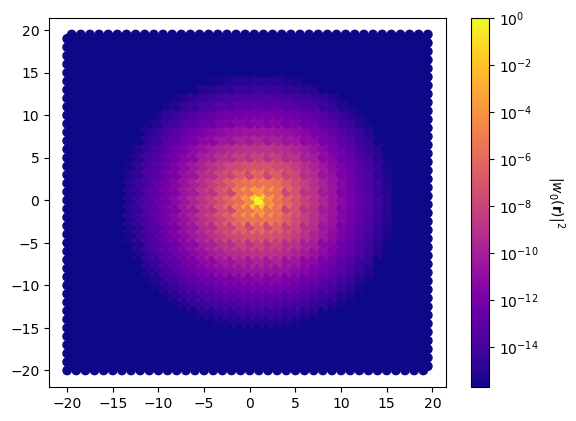

In [6]:
# outer_window = {"bands": list(range(n_occ))}
# inner_window = {"bands": [n_occ-1]}
outer_window = {"energy": [-3, 0]}
# inner_window = {"energy": [-1.3, 0]}
inner_window = None

WFs.max_loc(
    outer_window=outer_window, inner_window=inner_window,
    verbose=True, iter_num_omega_i=20000, iter_num_omega_til=100000, 
    eps=1e-4, tol_omega_i=1e-3, tol_omega_til=1e-3, grad_min=10
    )
WFs.plot(0)
WFs.report()

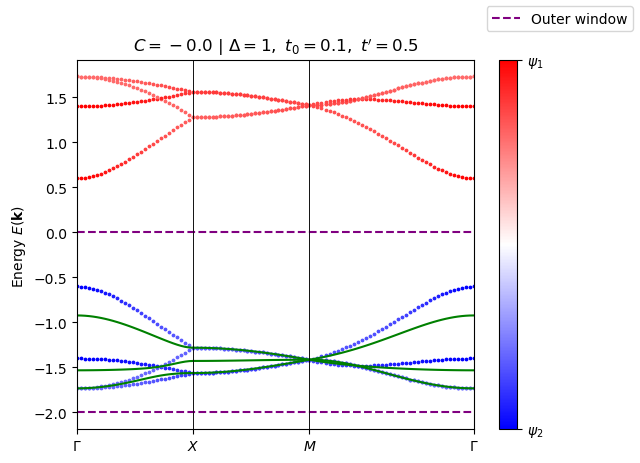

In [8]:
nk = 101
k_path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
k_label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
(k_vec, k_dist, k_node) = model.k_path(k_path, nk, report=False)

title = (rf"$C = {chern_occ: .1f}$ | $\Delta = {delta},\ t_0 = {t0},\ t' = {tprime}$")
fig, ax = plot.plot_bands(
    model, k_path=k_path, k_label=k_label, sub_lat=True, red_lat_idx=high_E_sites, title=title)

E_K = WFs.interp_energies(k_vec)
n_eigs = E_K.shape[-1]

# continuous bands
for n in range(n_eigs):
    ax.plot(k_dist, E_K[:, n], c='green')

# energy windows
if inner_window is not None:
    inner_window_vals = list(inner_window.values())[0]
    ax.axhline(inner_window_vals[0], ls='--', c='cyan')
    ax.axhline(inner_window_vals[-1], ls='--', c='cyan', label='Inner window')

outer_window_vals = list(outer_window.values())[0]
ax.axhline(outer_window_vals[0]+1, ls='--', c='purple')
ax.axhline(outer_window_vals[-1], ls='--', c='purple', label='Outer window')

fig.legend()

ax.set_title(title)
ax.set_ylabel(r"Energy $E(\mathbf{{k}})$ ")
ax.set_xlim(0, k_node[-1])
ax.set_xticks(k_node)
if k_label is not None:
    ax.set_xticklabels(k_label)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')

In [13]:
WFs.trial_wfs

array([[ 0.1488816 +0.j,  0.17617377+0.j,  0.30917982+0.j,
         0.22982918+0.j,  0.04297487+0.j,  0.28987151+0.j,
         0.32185321+0.j,  0.07029948+0.j],
       [ 0.28992399+0.j,  0.00146305+0.j, -0.2173457 +0.j,
        -0.16063683+0.j,  0.2775873 +0.j,  0.38823215+0.j,
        -0.19847915+0.j,  0.00156864+0.j],
       [-0.07080605+0.j, -0.00967768+0.j,  0.01899462+0.j,
        -0.03579946+0.j,  0.38601729+0.j, -0.20405521+0.j,
         0.05002404+0.j,  0.58410152+0.j]])

In [13]:
WFs.report()

Wannier function report
 --------------- 
Quadratic spread = [0.81264552 2.08591103 1.94477817]
Omega_i = 2.5473346549209737
Omega_tilde = 2.2960000590936067
Wannier centers: 
 [[0.02182364 1.15707874]
 [1.42704012 1.44498925]
 [0.80126541 0.69811281]]
